### Importing Libraries

In [1]:
import os
import cv2
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Naïve Bayes, Decision Tree, Random Forest, and SVM

### Extracting Data from local path

In [3]:
data = {
    'imgs' : [],
    'labels' : []
}

datapath = "C://Users//US593//Work//Datasets//Bone_Fracture_Classification//data"
count = 0 
for directory in os.listdir(datapath):
    subpath = os.path.join(datapath,directory)
    for classes in os.listdir(subpath):
        classes_path = os.path.join(subpath,classes)
        class_name = classes
        for filename in os.listdir(classes_path):
            if filename is not None: 
                data['labels'].append(class_name)
                filepath = os.path.join(classes_path,filename)
                img = cv2.imread(filepath)
                resized_img = cv2.resize(img,(224,224))
                img_gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
                data['imgs'].append(img_gray)
                count += 1
                if count%1000 == 0 : 
                    print(f"processed {count}")

processed 1000
processed 2000
processed 3000
processed 4000
processed 5000
processed 6000
processed 7000
processed 8000
processed 9000


In [4]:
combined = list(zip(data['imgs'], data['labels']))
shuffle(combined)
data['shuffled_imgs'],data['shuffled_labels'] = zip(*combined)

### Data Visualization

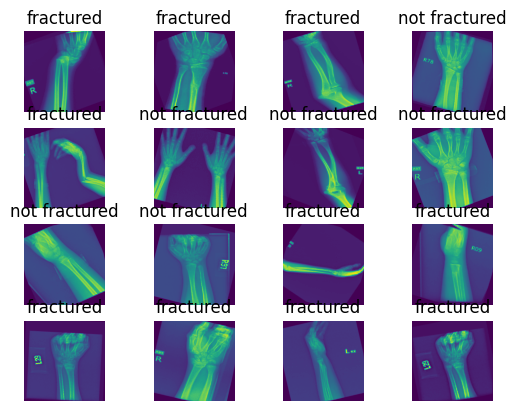

In [5]:
i = 0
for label , img in zip(data['shuffled_labels'][:16],data['shuffled_imgs'][:16]):
    ax = plt.subplot(4,4,i+1) # create subplot with in grid with (rows,columns,index)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
    if i == 16:
        break

### Noise Removal using Gaussian Blur

In [6]:
# nrg -> noise - remove - gaussian
data['nrg_imgs'] = []
count = 0
for img in data['shuffled_imgs']:
    gaus = cv2.GaussianBlur(img,(5,5),0)
    data['nrg_imgs'].append(gaus)
    count += 1
    if count%1000 == 0 : 
        print(f"processed {count}")

processed 1000
processed 2000
processed 3000
processed 4000
processed 5000
processed 6000
processed 7000
processed 8000
processed 9000


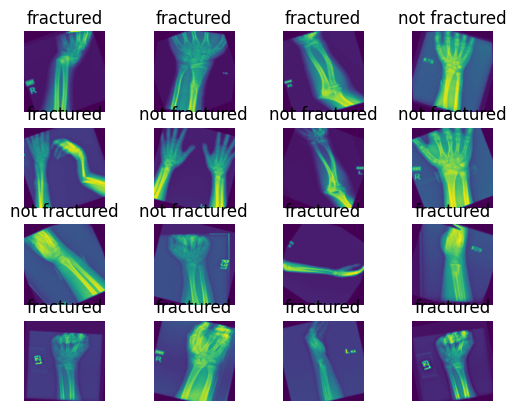

In [7]:
i = 0
for label , img in zip(data['shuffled_labels'][:16],data['nrg_imgs'][:16]):
    ax = plt.subplot(4,4,i+1) # create subplot with in grid with (rows,columns,index)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
    if i == 16:
        break

### Contrast Improvement using Adaptive Histogram Equalization

In [8]:
# ahe -> adaptive_histogram_equalization
data['ahe'] = []
count = 0
for img in data['shuffled_imgs']:
    clahe = cv2.createCLAHE(clipLimit = 3)
    final_img = clahe.apply(img)
    data['ahe'].append(final_img)
    count += 1
    if count%1000 == 0 : 
        print(f"processed {count}")

processed 1000
processed 2000
processed 3000
processed 4000
processed 5000
processed 6000
processed 7000
processed 8000
processed 9000


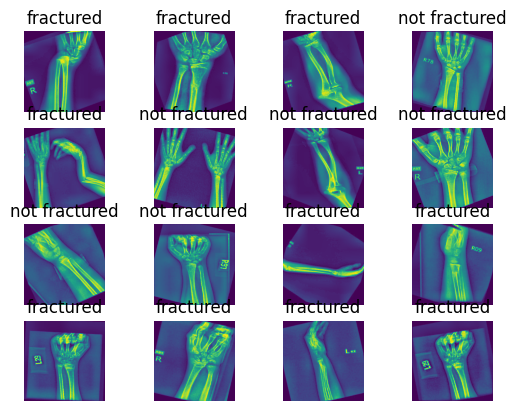

In [9]:
i = 0
for label , img in zip(data['shuffled_labels'][:16],data['ahe'][:16]):
    ax = plt.subplot(4,4,i+1) # create subplot with in grid with (rows,columns,index)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
    if i == 16:
        break

### Extracting Edges using Canny Edge Detector

In [10]:
# canny edge detection
data['canny_imgs'] = []
count = 0
for img in data['ahe']:
    img_edge = cv2.Canny(img,70,130)
    data['canny_imgs'].append(img_edge)
    count += 1
    if count%1000 == 0 : 
        print(f"processed {count}")

processed 1000
processed 2000
processed 3000
processed 4000
processed 5000
processed 6000
processed 7000
processed 8000
processed 9000


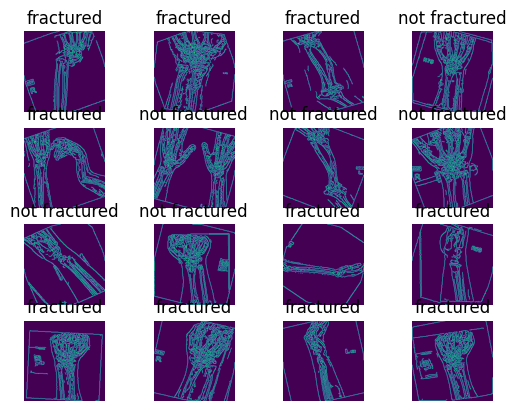

In [11]:
i = 0
for label , img in zip(data['shuffled_labels'][:16],data['canny_imgs'][:16]):
    ax = plt.subplot(4,4,i+1) # create subplot with in grid with (rows,columns,index)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
    if i == 16:
        break

### Stacking contrast improved and edge extracted images

In [12]:
train_ahe = np.array(data['ahe'])

In [13]:
train_canny = np.array(data['canny_imgs'])

In [14]:
train_imgs = np.concatenate((train_ahe,train_canny),axis = 1)

In [15]:
train_imgs.shape

(9463, 448, 224)

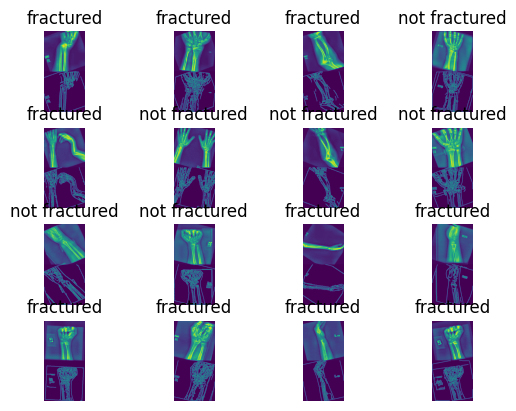

In [16]:
i = 0
for label , img in zip(data['shuffled_labels'][:16],train_imgs[:16]):
    ax = plt.subplot(4,4,i+1) # create subplot with in grid with (rows,columns,index)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    i += 1
    if i == 16:
        break

### Label Encoding

In [17]:
train_labels = np.array(data['shuffled_labels'])

In [18]:
le = LabelEncoder()
encoded_labels = le.fit_transform(train_labels)

In [19]:
encoded_labels[0]

0

In [20]:
# 0 -> fracutured
# 1 -> not fractured

In [21]:
train_imgs_flattened = np.reshape(train_imgs, (9463,100352))

In [22]:
train_imgs_flattened.shape

(9463, 100352)

### Scaling data

In [23]:
scaler = MinMaxScaler()

In [24]:
scaled_data = scaler.fit_transform(train_imgs_flattened)

In [25]:
scaled_data[0][0:20]

array([0.00403226, 0.00403226, 0.00408163, 0.00406504, 0.00398406,
       0.00398406, 0.00409836, 0.00411523, 0.00408163, 0.00413223,
       0.00403226, 0.00401606, 0.00401606, 0.00406504, 0.00411523,
       0.00408163, 0.00413223, 0.00413223, 0.00404858, 0.00409836])

### train_test_split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(train_imgs_flattened, encoded_labels, test_size = 0.5,shuffle = True, random_state = 31, stratify = encoded_labels) 

In [28]:
x_train.shape

(4731, 100352)

In [29]:
y_train.shape

(4731,)

In [30]:
x_test.shape

(4732, 100352)

In [31]:
y_test.shape

(4732,)

### training multiple models using GridSearchCV

In [32]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

def gridsearchcv(X, y):
    algos = {
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {
               'priors' : [None]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'min_samples_split': [40]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini']
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'kernel': ['rbf'] ,
                'C' : [10000]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        pickle.dump(gscv, open(f'{algo_name}_model.p', 'wb'))
        

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [33]:
stats = gridsearchcv(x_train,y_train)

### Saving test results

In [34]:
stats.to_csv('stats.csv')

In [35]:
stats

,model,best_score,best_params
0,naive_bayes,0.619430,{'priors': None}
1,decision_tree,0.844562,{'min_samples_split': 40}
2,random_forest,0.957128,{'criterion': 'gini'}
3,svm,0.883844,"{'C': 10000, 'kernel': 'rbf'}"
